# Homework 5 Code

In [2]:
# Add import statements here
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Random Forest

The `random_forest` function learns an ensemble of numBags CART decision trees using a random subset of the features at each split on the input dataset and also plots the  out-of-bag error as a function of the number of bags

Inputs:
* `X_train` is the training data
* `y_train` are the training labels
* `X_test` is the testing data
* `y_test` are the testing labels
* `num_bags` is the number of trees to learn in the ensemble
* `m` is the number of randomly selected features to consider at each split

Outputs: 
* `out_of_bag_error` is the out-of-bag classification error of the final learned ensemble
* `test_error` is the classification error of the final learned ensemble on test data



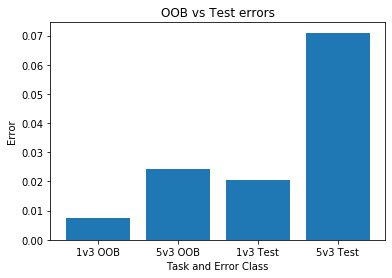

In [118]:
x = ["1v3 OOB", "5v3 OOB", "1v3 Test", "5v3 Test"]
y = [0.007535, 0.02415, 0.020512, 0.0709779]
plt.bar(x, y)
plt.xlabel("Task and Error Class")
plt.ylabel("Error")
plt.title("OOB vs Test errors")
plt.show()

In [101]:
def random_forest(X_train, y_train, X_test, y_test, num_bags, m):
    # set the model
    tree = DecisionTreeClassifier(max_features = m)
    # relate which models weren't trained on each data point
    data_to_not_trained_on = {}
    # number of data points
    n = len(y_train)
    print(n, "samples")
    # keep track of all models for test error
    all_models = []
    for bag in range(num_bags):
        # randomly select n data points from the bag of data points
        rand_selection = np.random.randint(low=0, high=n-1, size=n)
        x_choose = X_train[rand_selection , :]
        y_choose = y_train[rand_selection]
        # train
        model = tree.fit(x_choose, y_choose)
        all_models.append(model)
        # track which data point this model wasn't trained on
        for i in (set(range(n)) - set(rand_selection)):
            data_to_not_trained_on.setdefault(i, []).append(model)
            
    # out of bag error; validation
    size_s = len(data_to_not_trained_on.items())
    bag_error_sum = sum([g_bar_error(models, X_train[i], y_train[i]) 
                     for i, models in data_to_not_trained_on.items()])
    out_of_bag_error = bag_error_sum / size_s
    
    # test error
    size_test = len(y_test)
    test_error_sum = sum([g_bar_error(all_models, X_test[i], y_test[i]) 
                     for i in range(size_test)])
    test_error = test_error_sum / size_test

    return out_of_bag_error, test_error

In [102]:
def g_bar_error(models, x, y):
    y_hat = []
    for model in models:
        y_hat.append(model.predict(np.reshape(x, (1, x.shape[0])))[0])
    return int(mode(y_hat, axis=None)[0][0] != y)

## Run and Plot

Run your random forest code and plot figures below

In [97]:
# Other random forest code here:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train_test = np.array(three_x_train + five_x_train)
y_train_test = np.array(three_y_train + five_y_train)
n = len(x_train_test)
rand = np.ndarray.flatten(np.random.choice(range(n), size=int(0.5*n)))
x_test_test = np.array(three_x_test + five_x_test)
y_test_test = np.array(three_y_test + five_y_test)
three_five_results = [random_forest(x_train_test, 
              y_train_test, 
              x_test_test,
             y_test_test, i, 50) for i in [1, 5, 25, 50, 100, 200, 300]]

num_bags = ["1", "5", "25", "50", "100", "200", "300"]
plt.bar(num_bags, [d[0] for d in three_one_results])
plt.xlabel("# bags")
plt.ylabel("OOB error")
plt.title("1 vs 3")
plt.show()
print(three_one_results)

num_bags = ["1", "5", "25", "50", "100", "200", "300"]
plt.bar(num_bags, [d[0] for d in three_five_results])
plt.xlabel("# bags")
plt.ylabel("OOB error")
plt.title("3 vs 5")
plt.show()
print(three_five_results)

x = ["1v3 OOB", "5v3 OOB", "1v3 Test", "5v3 Test"]
y = [0.007535, 0.02415, 0.020512, 0.0709779]
plt.bar(x, y)
plt.xlabel("Task and Error Class")
plt.ylabel("Error")
plt.title("OOB vs Test errors")
plt.show()

In [ ]:
x_train_test = np.array(three_x_train + one_x_train)
y_train_test = np.array(three_y_train + one_y_train)
n = len(x_train_test)
rand = np.ndarray.flatten(np.random.choice(range(n), size=int(0.5*n)))
x_test_test = np.array(three_x_test + one_x_test)
y_test_test = np.array(three_y_test + one_y_test)
three_one_results = [random_forest(x_train_test, 
              y_train_test, 
              x_test_test,
             y_test_test, i, 50) for i in [1, 5, 25, 50, 100, 200, 300]]

In [98]:
number_to_data = {}
for i, label in enumerate(y_train):
    number_to_data.setdefault(label, []).append(np.ndarray.flatten(x_train[i]))
number_to_test_data = {}
for i, label in enumerate(y_test):
    number_to_test_data.setdefault(label, []).append(np.ndarray.flatten(x_test[i]))

In [99]:
three_x_train = number_to_data[3]
three_y_train = [3 for i in range(len(three_x_train))]
one_x_train = number_to_data[1]
one_y_train = [1 for i in range(len(one_x_train))]
five_x_train = number_to_data[5]
five_y_train = [5 for i in range(len(five_x_train))]

three_x_test = number_to_test_data[3]
three_y_test = [3 for i in range(len(three_x_test))]
one_x_test = number_to_test_data[1]
one_y_test = [1 for i in range(len(one_x_test))]
five_x_test = number_to_test_data[5]
five_y_test = [5 for i in range(len(five_x_test))]